# Task 3

*by Lukas Dötlinger*

## Part 1

We can compute the most common words by using the `most_common` function of a `FreqDist` in `nltk`.
The samples were generated by using `nltk.corpus.nps_chat` and `nltk.corpus.gutenberg`. The list was further filter to exclude any word containing non alphabetic charcters.

In [32]:
from nltk.corpus import nps_chat, gutenberg
from nltk.probability import FreqDist

filter_words = lambda words: [ word.lower() for word in words if word.isalpha() ]

nps_chat_filtered = filter_words(nps_chat.words())
gutenberg_filtered = filter_words(gutenberg.words())

nps_chat_dist = FreqDist(nps_chat_filtered)
gutenberg_dist = FreqDist(gutenberg_filtered)

nps_most_common = nps_chat_dist.most_common(100)
gutenberg_most_common = gutenberg_dist.most_common(100)

print('nps_chat top 100 - gutenberg top 100')
for n, g in zip(nps_most_common, gutenberg_most_common):
    print('{} - {}'.format(n, g))


nps_chat top 100 - gutenberg top 100
('i', 1224) - ('the', 133583)
('part', 1022) - ('and', 95442)
('join', 1021) - ('of', 71267)
('lol', 822) - ('to', 48057)
('you', 686) - ('a', 33960)
('to', 665) - ('in', 33580)
('the', 660) - ('i', 30265)
('hi', 656) - ('that', 28798)
('a', 580) - ('he', 25857)
('me', 428) - ('it', 22303)
('is', 380) - ('his', 21402)
('in', 364) - ('for', 19527)
('and', 357) - ('was', 18715)
('it', 355) - ('with', 17599)
('action', 347) - ('not', 17373)
('hey', 292) - ('is', 16435)
('that', 284) - ('you', 16398)
('my', 259) - ('be', 16115)
('of', 207) - ('as', 14528)
('u', 204) - ('but', 13944)
('what', 201) - ('all', 13725)
('on', 189) - ('they', 13104)
('for', 189) - ('him', 13012)
('here', 185) - ('shall', 11682)
('are', 181) - ('her', 11552)
('do', 181) - ('my', 10511)
('no', 181) - ('had', 10317)
('not', 179) - ('them', 10245)
('have', 171) - ('have', 10116)
('all', 168) - ('s', 9896)
('up', 161) - ('me', 9469)
('like', 160) - ('said', 9429)
('with', 154) - ('

*Zipf's Law* states that rank $r$ of a word multiplied by its frequency $f$ is approximately constant $k$, assuming the words are ranked in order of decreasing frequency: $r * f = k$.

We can use the already ordered lists of top 100 words to plot a graph showing the relation between frequency and rank of words.

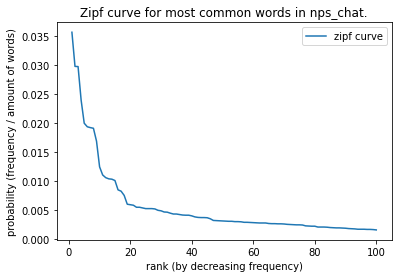

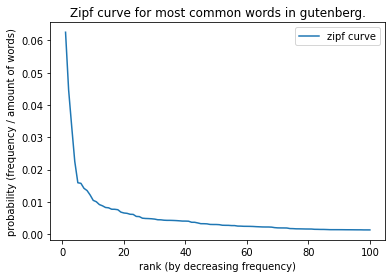

In [44]:
import matplotlib
import matplotlib.pyplot as plt

def plot_zipf_curve(words, total_words, title, plot_callback):
    plot_callback(range(1, len(words) + 1), [ frequency / total_words for (word, frequency) in words ], label = 'zipf curve')
    plt.title(title)
    plt.xlabel('rank (by decreasing frequency)')
    plt.ylabel('probability (frequency / amount of words)')
    plt.legend()
    plt.show()


plot_zipf_curve(nps_most_common, len(nps_chat_filtered), 'Zipf curve for most common words in nps_chat.', plt.plot)
plot_zipf_curve(gutenberg_most_common, len(gutenberg_filtered), 'Zipf curve for most common words in gutenberg.', plt.plot)

From the above graphs we can observe that the `gutenberg` corpus is more consistent with *Zipf's Law* than the `nps_chat` corpus.

When looking at the lenght of the top 100 words, we can see that the word lenght is overall increasing with decreasing frequency. This can be related to the high amount of stopwords in the most mentioned words, which are shorter than the average word in a language.

## Part 2

In [52]:
from nltk.corpus import stopwords

remove_stopwords = lambda words: [ word for word in words if word not in set(stopwords.words('english')) ]

hamlet_words = remove_stopwords(filter_words(gutenberg.words('shakespeare-hamlet.txt')))[:1000]
chat_words = remove_stopwords(filter_words(nps_chat.words('10-19-20s_706posts.xml')))[:1000]

print(chat_words)

['im', 'left', 'gay', 'name', 'part', 'hey', 'everyone', 'ah', 'well', 'nick', 'gay', 'name', 'action', 'gives', 'golf', 'clap', 'join', 'hi', 'ky', 'women', 'nice', 'please', 'pm', 'join', 'part', 'ya', 'go', 'golf', 'clap', 'fuck', 'whats', 'everyone', 'part', 'part', 'thunder', 'clap', 'ass', 'part', 'dont', 'even', 'know', 'means', 'sounds', 'painful', 'ladis', 'wanna', 'chat', 'join', 'cousin', 'drew', 'messed', 'pic', 'cast', 'part', 'boo', 'sexy', 'lol', 'boo', 'join', 'part', 'drew', 'girl', 'legs', 'spread', 'boo', 'hope', 'didnt', 'draw', 'penis', 'part', 'ewwwww', 'lol', 'head', 'legs', 'join', 'join', 'sounds', 'good', 'r', 'u', 'serious', 'join', 'part', 'take', 'one', 'please', 'go', 'docs', 'tomorrow', 'ya', 'man', 'connected', 'slip', 'away', 'fade', 'away', 'days', 'away', 'still', 'feel', 'touching', 'changing', 'considerably', 'killing', 'heeeey', 'sharpie', 'back', 'yep', 'ladies', 'wanna', 'chat', 'hurry', 'ladies', 'part', 'join', 'join', 'fast', 'enough', 'bowl',